# Bank Customer Churn Part 1 

## Part 1 We will cover below steps:
1. [**Business Problem Formulation**](#business-problem-formulation)
2. [**Data Collection**](#data-collection)
3. [**Data Cleaning and Processing**](#data-cleaning-and-processing)
   - [3.1 **Handle Missing Data**](#handle-missing-data)
   - [3.2 **Handle Outliers**](#handle-outliers)
     - [3.2.1 **Box Plot and Histogram to visualize numerical variables**](#box-plot-and-histogram)
     - [3.2.2 **Identify and visualize outliers using the IQR method**](#identify-and-visualize-outliers-iqr-method)
     - [3.2.3 **Detect the number of records with outliers**](#detect-records-with-outliers)
     - [3.2.4 **Cap the Outliers (Replace them with lower/upper bounds)**](#cap-outliers)
   - [3.3 **Change Data Type**](#change-data-type)
   - [3.4 **Encoding Categorical Variables**](#encoding-categorical-variables)
---
## 1 Business Problem Formulation:
<a name="business-problem-formulation"></a>
Customer attrition is a critical problem for financial institutions, as it is more expensive to acquire new customers than to retain existing ones. By predicting which customers are likely to churn, the bank can implement **targeted retention strategies**, **proactive customer engagement**, **real-time churn alerts**, **improving customer retention** and **reducing revenue losses**.

To predict **customer attrition** (churn) based on various **categorical** and **numerical** attributes provided by a bank. **Attrition** represents customers who have stopped using the bank’s services. The goal is to identify key drivers of customer attrition and build a predictive model to proactively address churn risks.

---

## Dataset Overview

| Column                  | Type                   | Description                                                            |
|-------------------------|------------------------|------------------------------------------------------------------------|
| CLIENTNUM               | Identifier             | Unique identifier for each customer                                     |
| Attrition_Flag           | Categorical (Target)   | Indicates if a customer is attrited (churned)                           |
| Customer_Age             | Numeric                | Age of the customer                                                    |
| Gender                   | Categorical            | Gender of the customer                                                 |
| Dependent_count          | Numeric                | Number of dependents the customer has                                  |
| Education_Level          | Categorical            | Customer’s level of education                                          |
| Marital_Status           | Categorical            | Marital status of the customer                                         |
| Income_Category          | Categorical            | Customer’s income category                                             |
| Card_Category            | Categorical            | Credit card category held by the customer                              |
| Months_on_book           | Numeric                | Number of months the customer has been with the bank                   |
| Total_Relationship_Count | Numeric                | Number of bank products the customer holds                             |
| Months_Inactive_12_mon   | Numeric                | Number of months in the past year the customer has been inactive        |
| Contacts_Count_12_mon    | Numeric                | Number of contacts the customer had with the bank in the past year      |
| Credit_Limit             | Numeric                | Maximum credit limit on the customer’s card                            |
| Total_Revolving_Bal      | Numeric                | Total balance carried over month-to-month                              |
| Avg_Open_To_Buy          | Numeric                | Average available credit                                               |
| Total_Amt_Chng_Q4_Q1     | Numeric                | Percentage change in transaction amount from Q4 to Q1                  |
| Total_Trans_Amt          | Numeric                | Total transaction amount                                               |
| Total_Trans_Ct           | Numeric                | Total count of transactions                                            |
| Total_Ct_Chng_Q4_Q1      | Numeric                | Percentage change in transaction count from Q4 to Q1                   |
| Avg_Utilization_Ratio    | Numeric                | Ratio of balance to credit limit (credit utilization)                  |

## 2. Data Collection
<a name="data-collection"></a>
(10127 rows, 21 columns)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
import zipfile

# Define the zip file and extraction directory
zip_file_path = 'archive.zip'
extracted_dir = 'bank_data'

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Load the extracted CSV file into a pandas DataFrame
csv_file_path = f'{extracted_dir}/BankChurners.csv'
raw_data = pd.read_csv(csv_file_path)

# Print the number of records
print(f"Number of raw records: {len(raw_data)}")

# Display the first few rows of the data
#raw_data.head()
df = raw_data.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.info()

Number of raw records: 10127
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 

In [5]:
df.shape

(10127, 21)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 3. Data Cleansing and Processing
<a name="data-cleaning-and-processing"></a>

### 3.1 Handle Missing Data
<a name="handle-missing-data"></a>

In [9]:
# Step 1: Check for missing data
missing_data = df.isnull().sum()
missing_data_percent = (missing_data / len(df)) * 100

# Display missing data summary
print("Missing Data Summary:")
print(missing_data[missing_data > 0])  # Only showing columns with missing data

# Step 2: Handling missing data
# For categorical columns, we can fill missing values with the mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# For numeric columns, we can fill missing values with the median (or mean) if appropriate
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Final check for missing data after handling
missing_data_after = df.isnull().sum()

# Display any remaining missing data after handling
print("\nRemaining Missing Data After Handling:")
print(missing_data_after[missing_data_after > 0])

# Display the cleaned data summary
df.info()

Missing Data Summary:
Series([], dtype: int64)

Remaining Missing Data After Handling:
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Cont

In [10]:
# Combine missing data and types in a summary table
data_types = df.dtypes
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage Missing': missing_data_percent,
    'Data Type': data_types
})

# Display the first few rows of the summary
missing_data_summary

,Missing Values,Percentage Missing,Data Type
CLIENTNUM,0,0.0,int64
Attrition_Flag,0,0.0,object
Customer_Age,0,0.0,int64
Gender,0,0.0,object
Dependent_count,0,0.0,int64
Education_Level,0,0.0,object
Marital_Status,0,0.0,object
Income_Category,0,0.0,object
Card_Category,0,0.0,object
Months_on_book,0,0.0,int64


### 3.2 Handle Outliers
<a name="handle-outliers"></a>
For numeric variables, we’ll identify outliers using the IQR method and handle them by capping or removing extreme outliers.

#### 3.2.1 Box Plot and Histogram to visualize numerical variables
<a name="box-plot-and-histogram">


Outlier Analysis for Customer_Age:


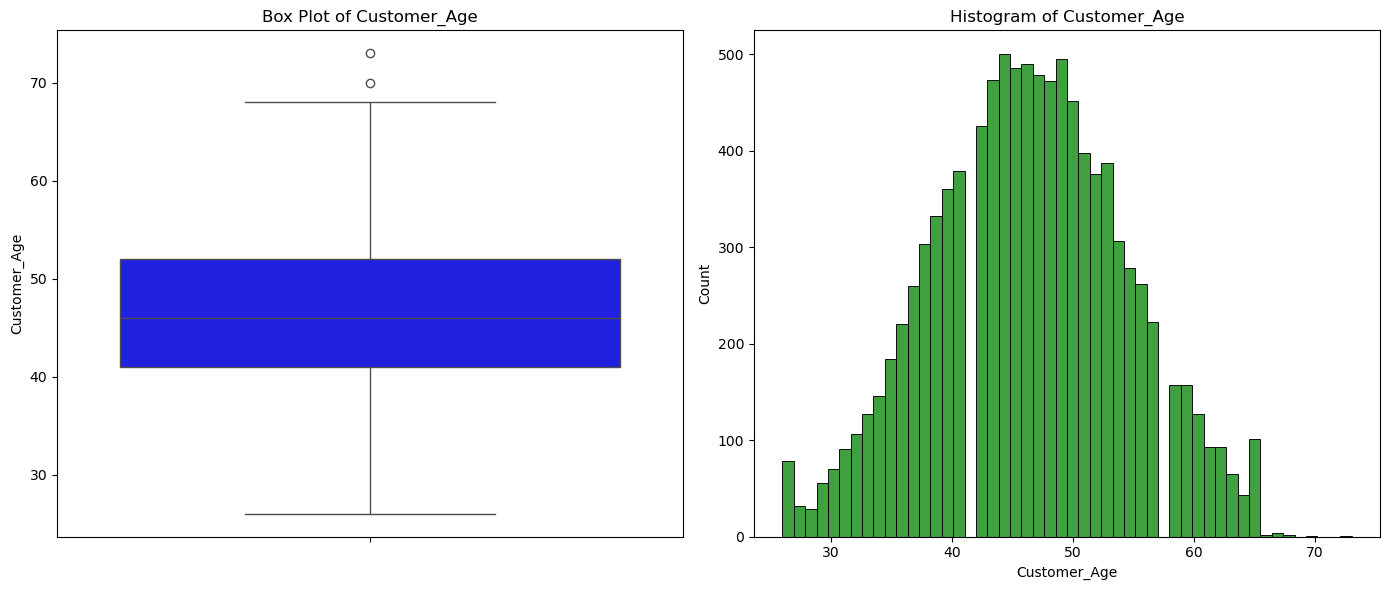


Outlier Analysis for Dependent_count:


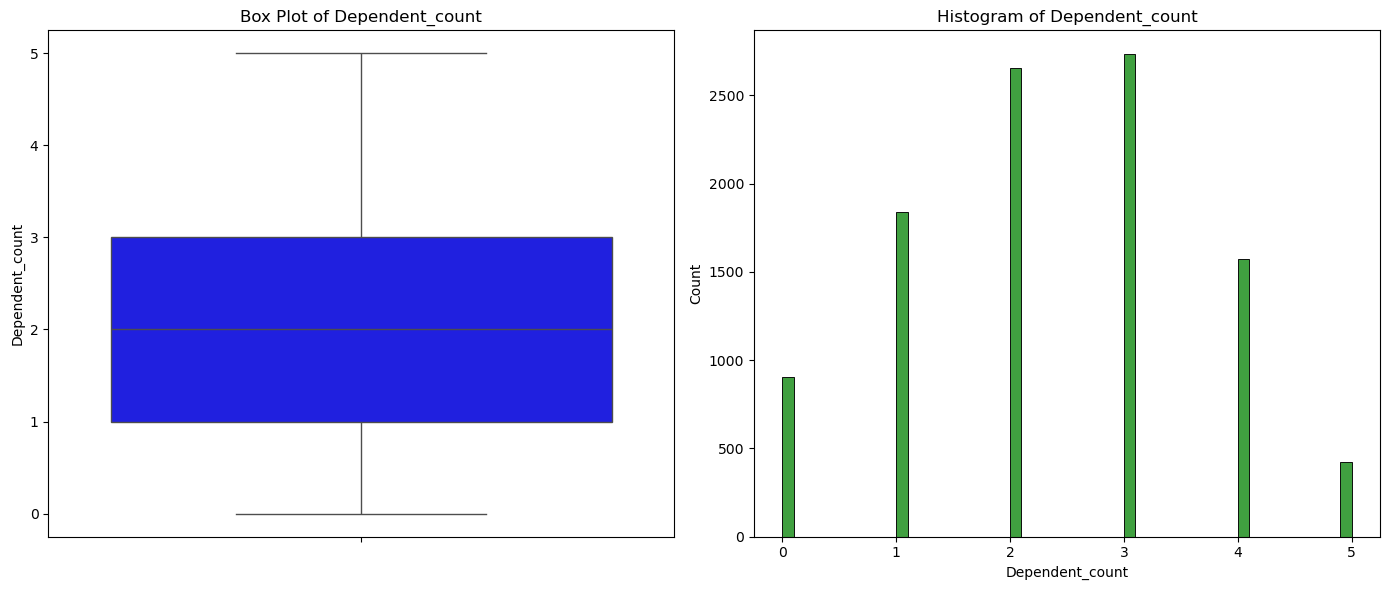


Outlier Analysis for Months_on_book:


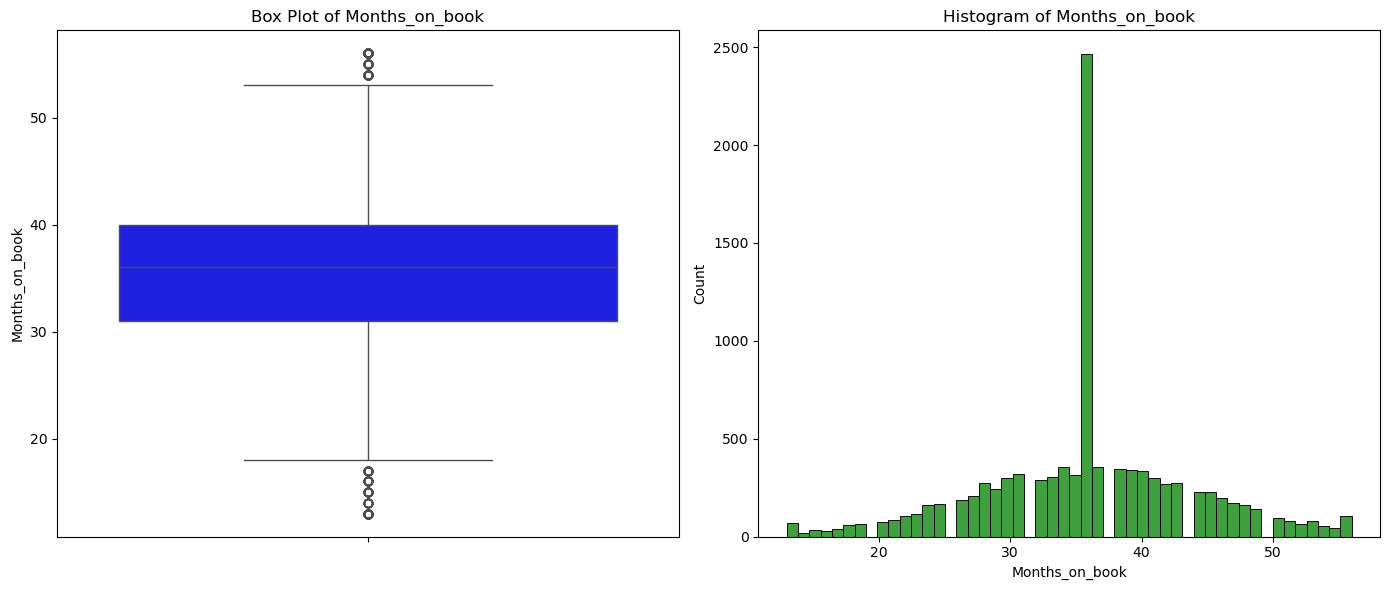


Outlier Analysis for Total_Relationship_Count:


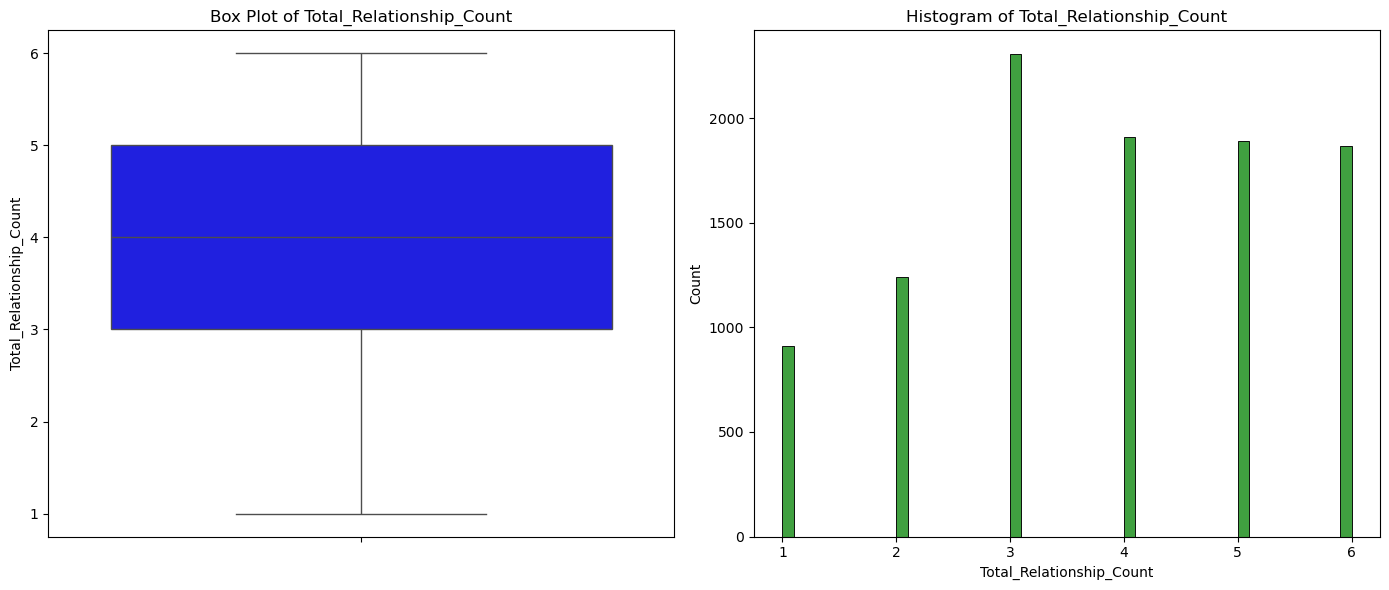


Outlier Analysis for Months_Inactive_12_mon:


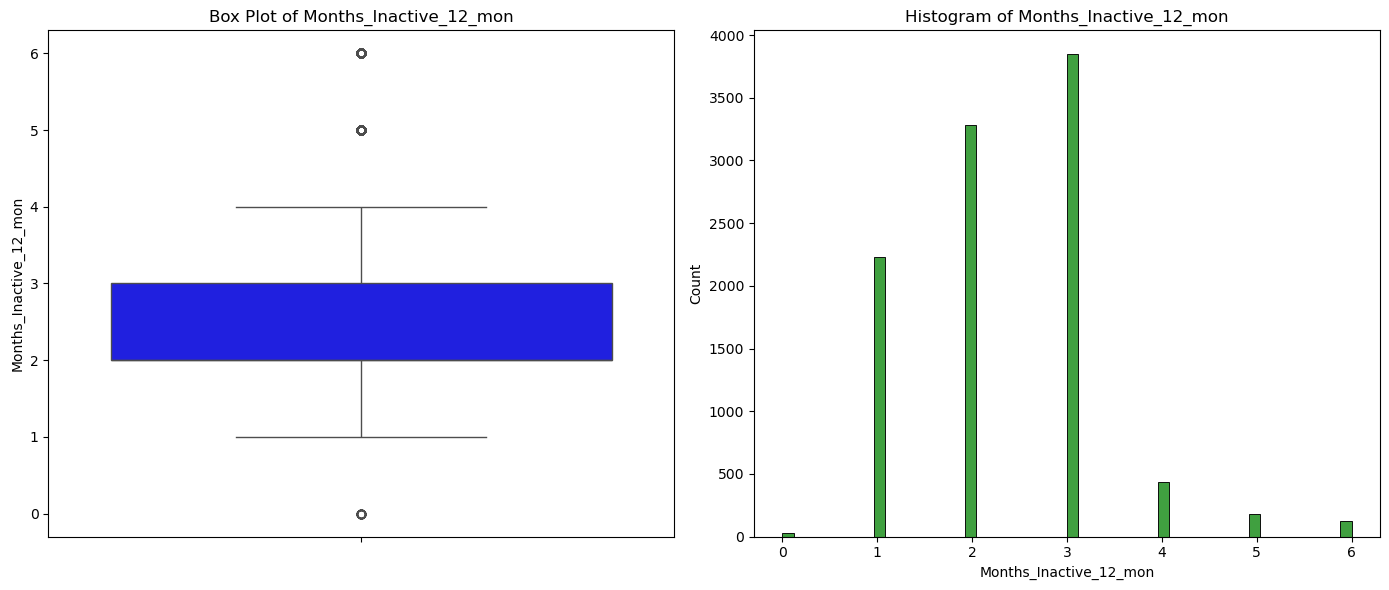


Outlier Analysis for Contacts_Count_12_mon:


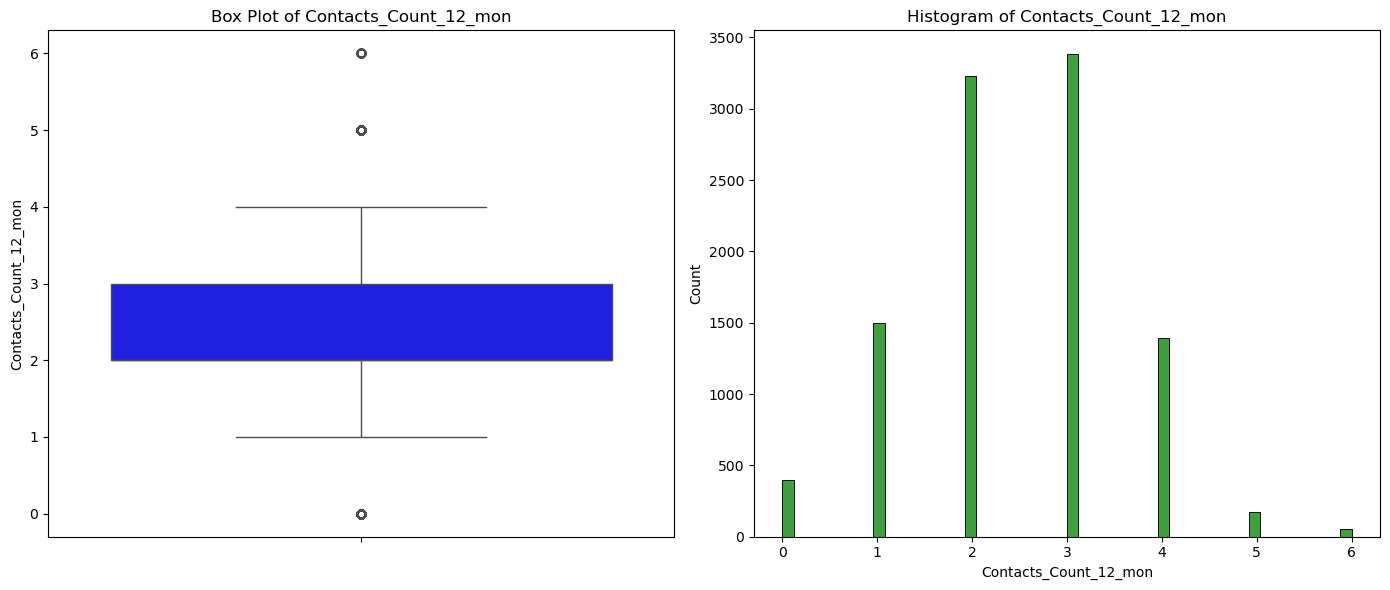


Outlier Analysis for Credit_Limit:


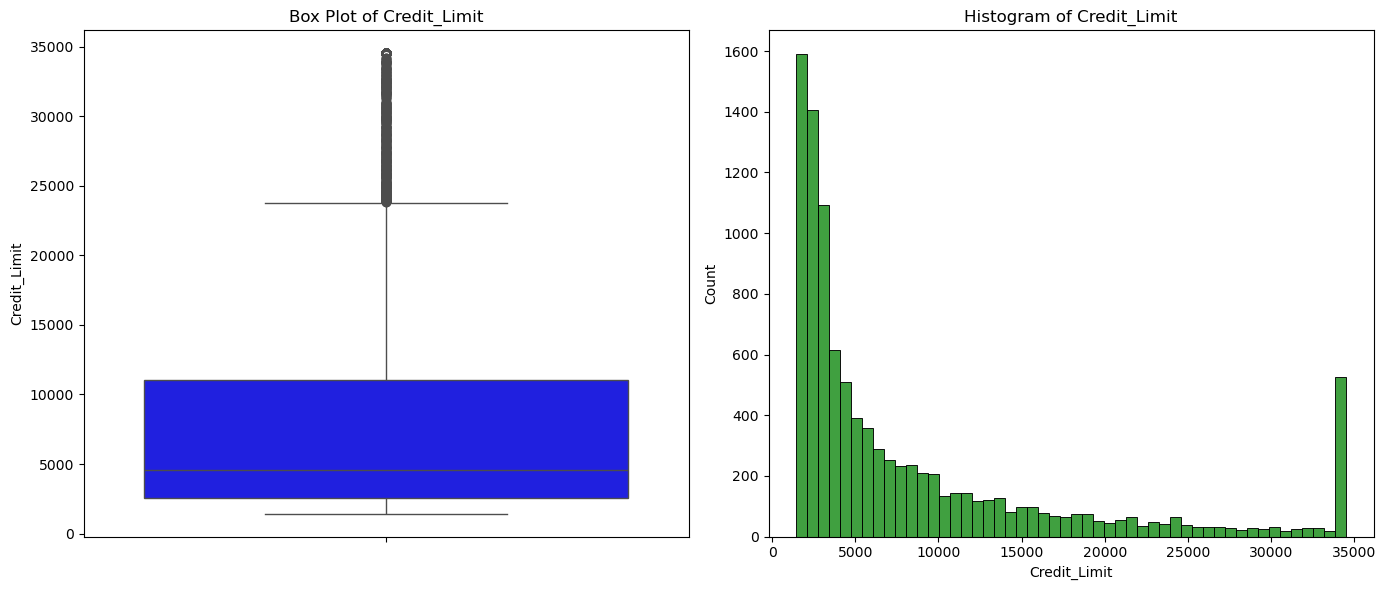


Outlier Analysis for Total_Revolving_Bal:


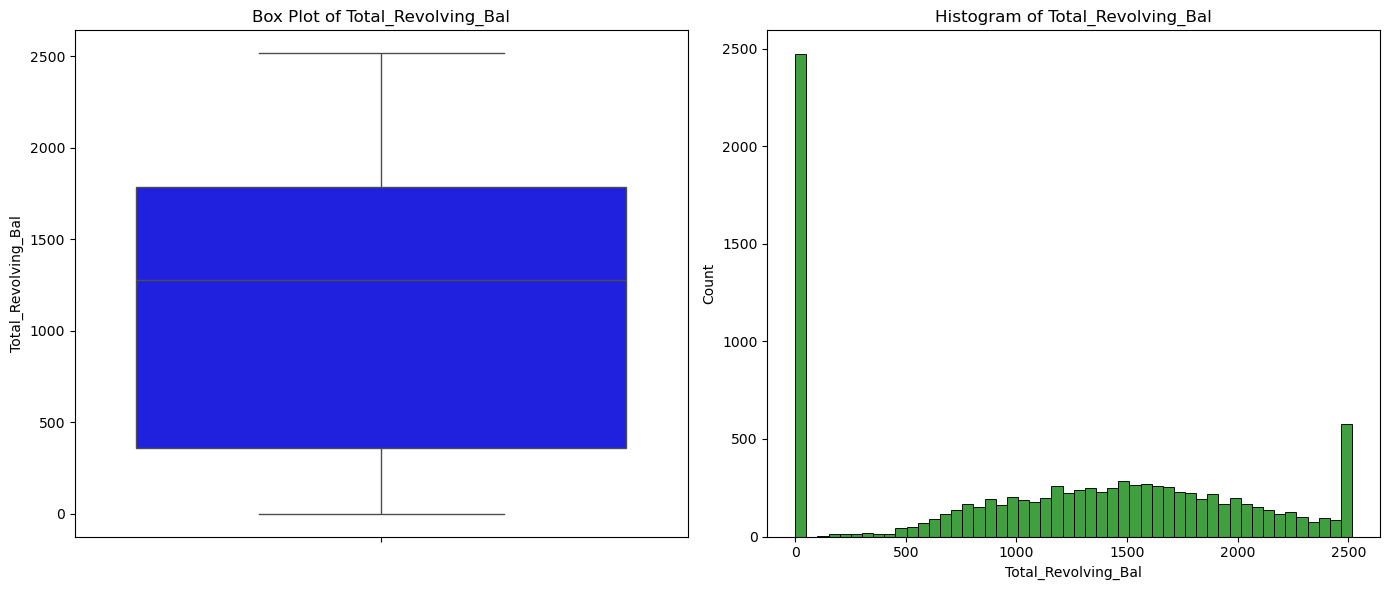


Outlier Analysis for Avg_Open_To_Buy:


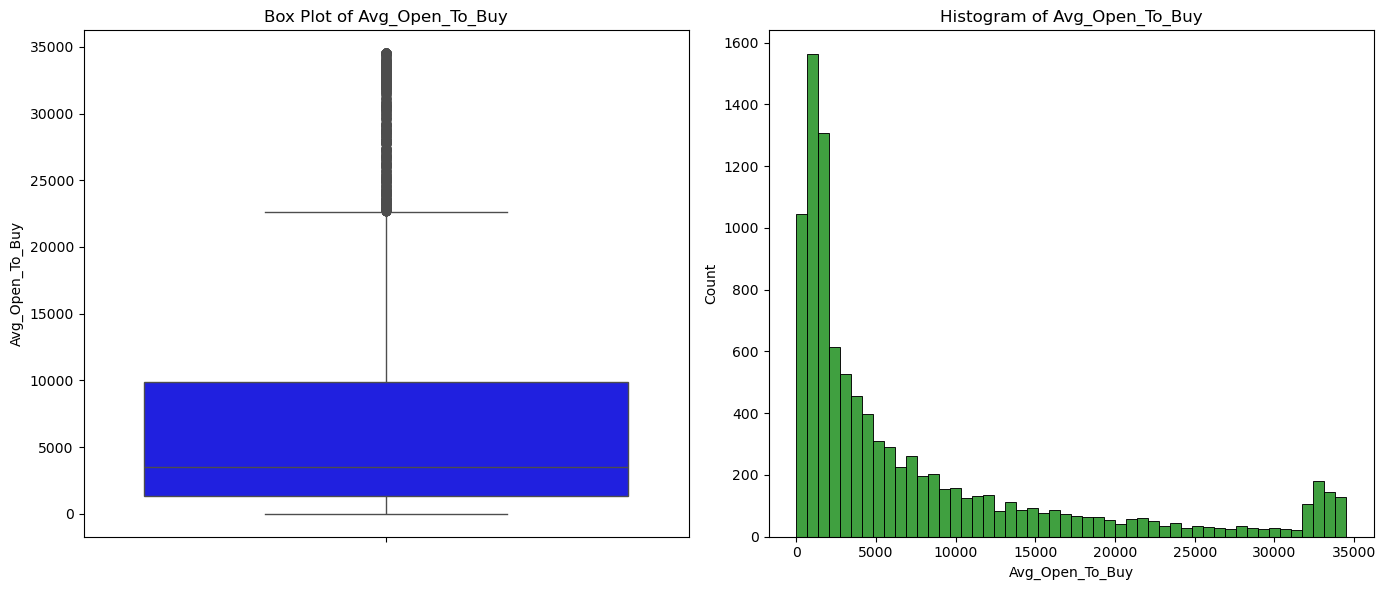


Outlier Analysis for Total_Amt_Chng_Q4_Q1:


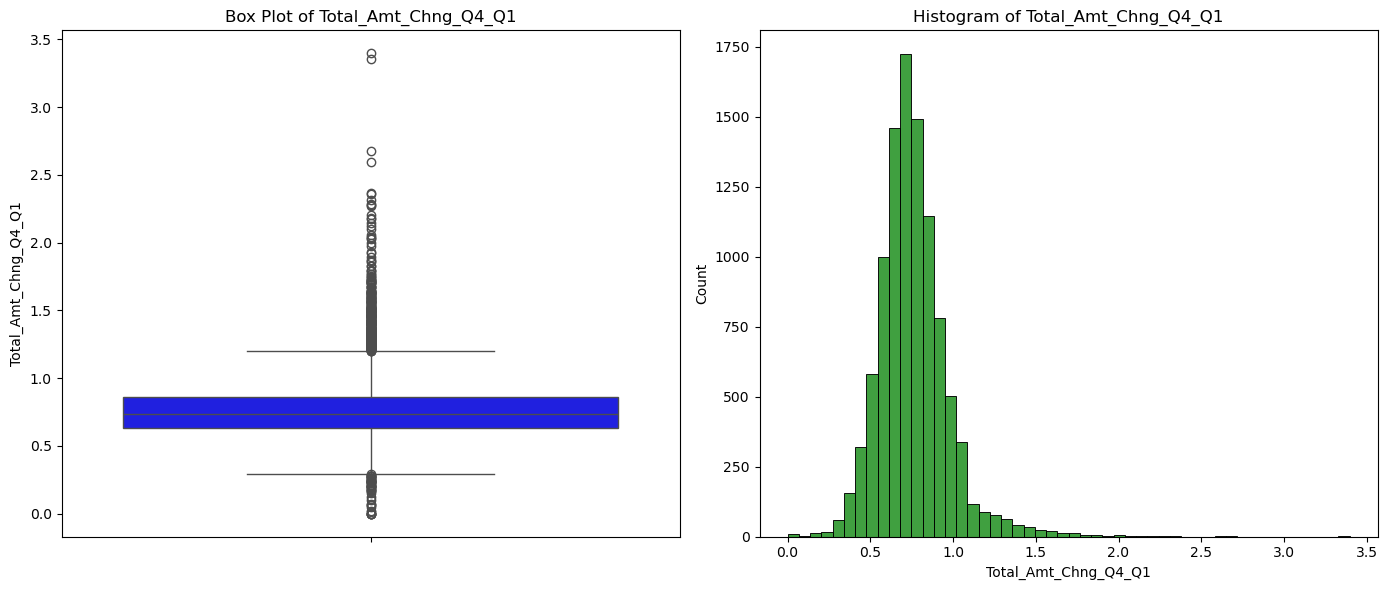


Outlier Analysis for Total_Ct_Chng_Q4_Q1:


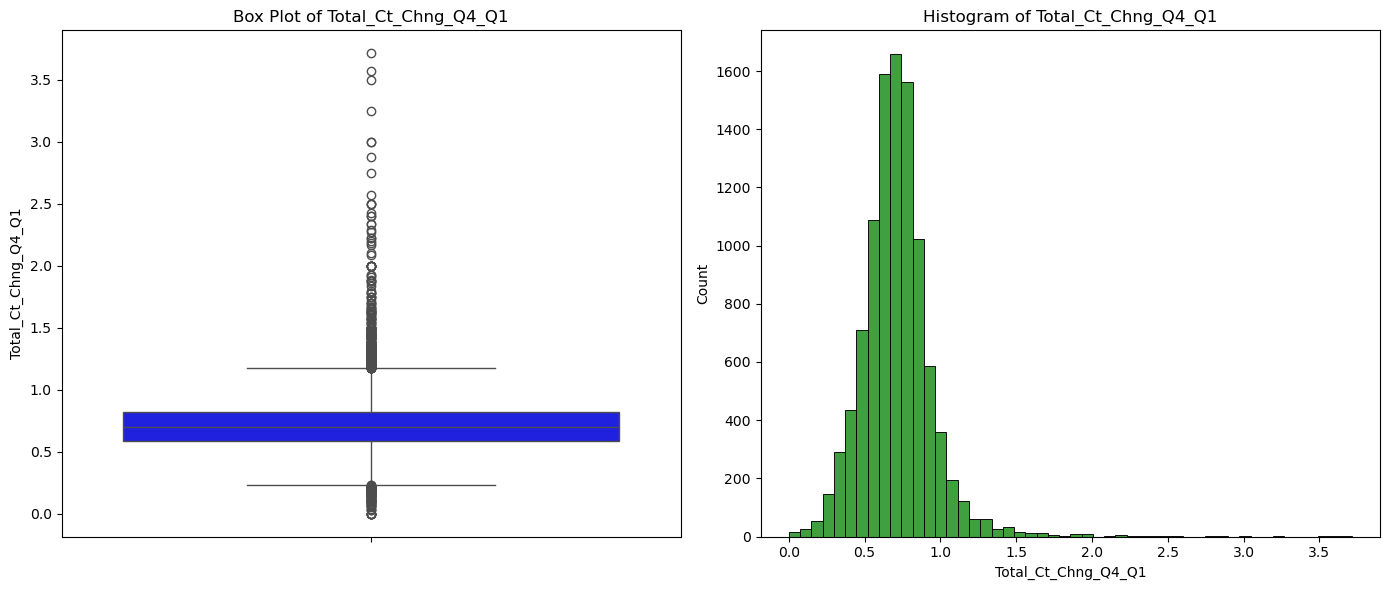


Outlier Analysis for Total_Trans_Amt:


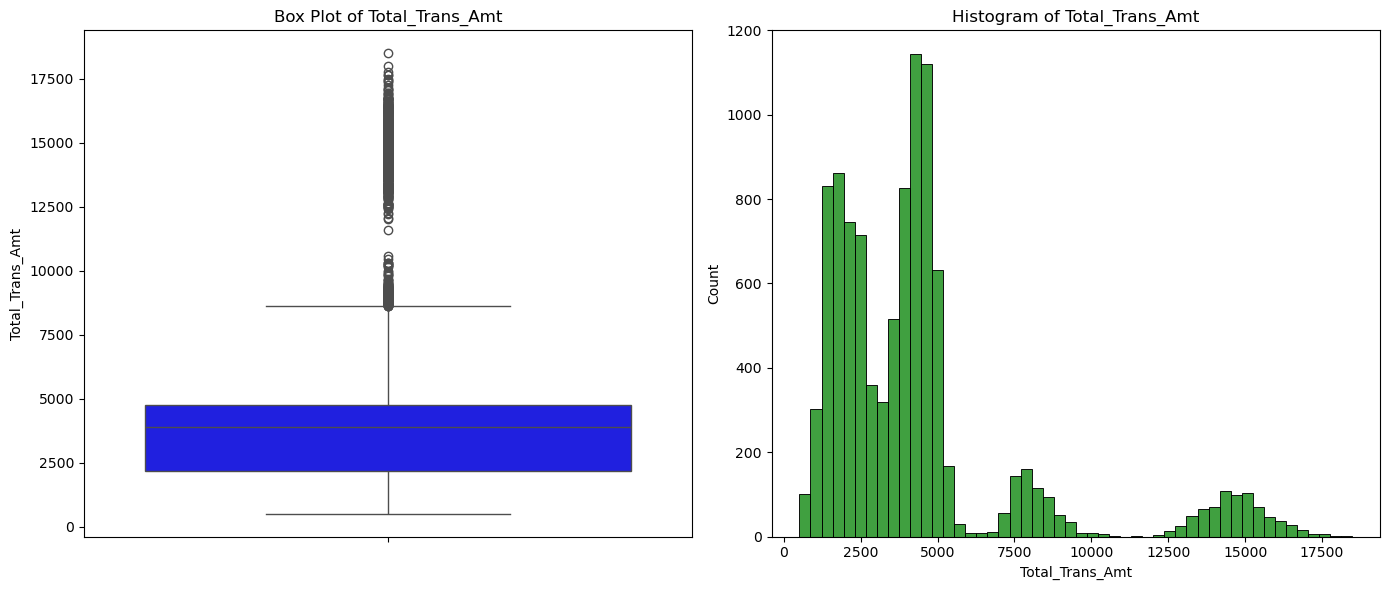


Outlier Analysis for Total_Trans_Ct:


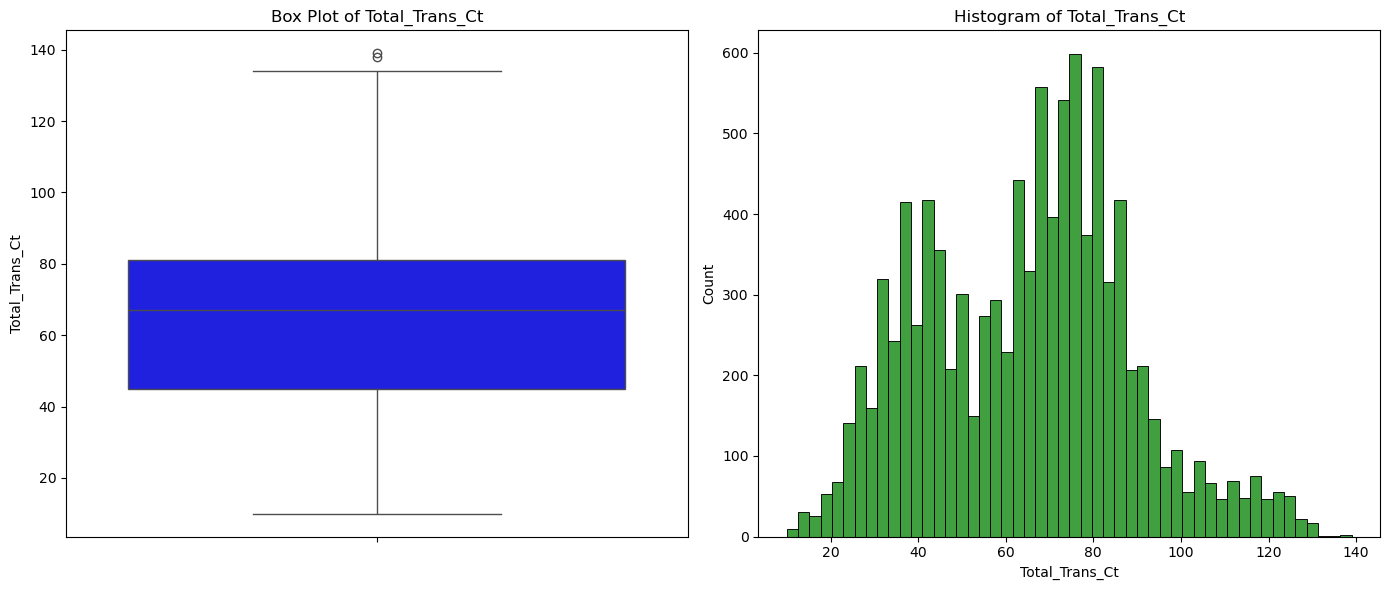


Outlier Analysis for Avg_Utilization_Ratio:


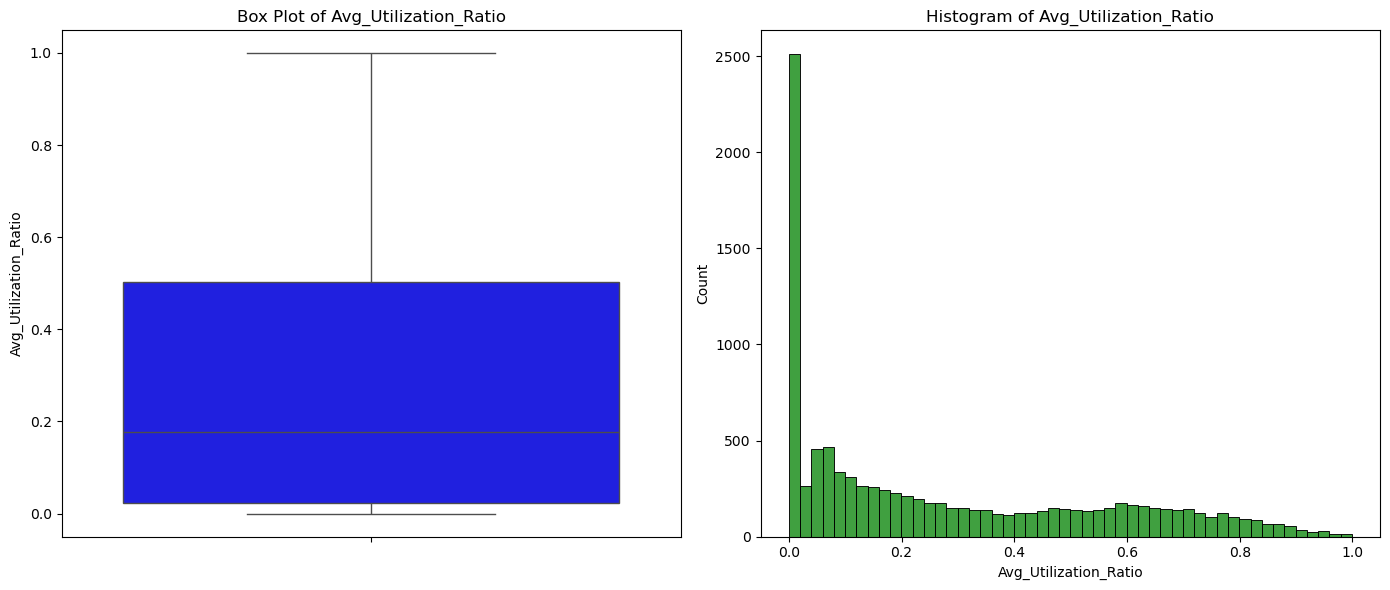

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot boxplot and histogram for a given attribute
def plot_outlier_analysis(df, column):
    plt.figure(figsize=(14, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column], color='blue')
    plt.title(f'Box Plot of {column}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=50, color='green')
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

# List of numeric columns to examine for outliers
numeric_columns_to_examine = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Plot outlier analysis for each numeric column
for column in numeric_columns_to_examine:
    print(f"\nOutlier Analysis for {column}:")
    plot_outlier_analysis(df, column)

#### 3.2.2 Identify and visualize outliers using the IQR method
<a name="identify-and-visualize-outliers-iqr-method">

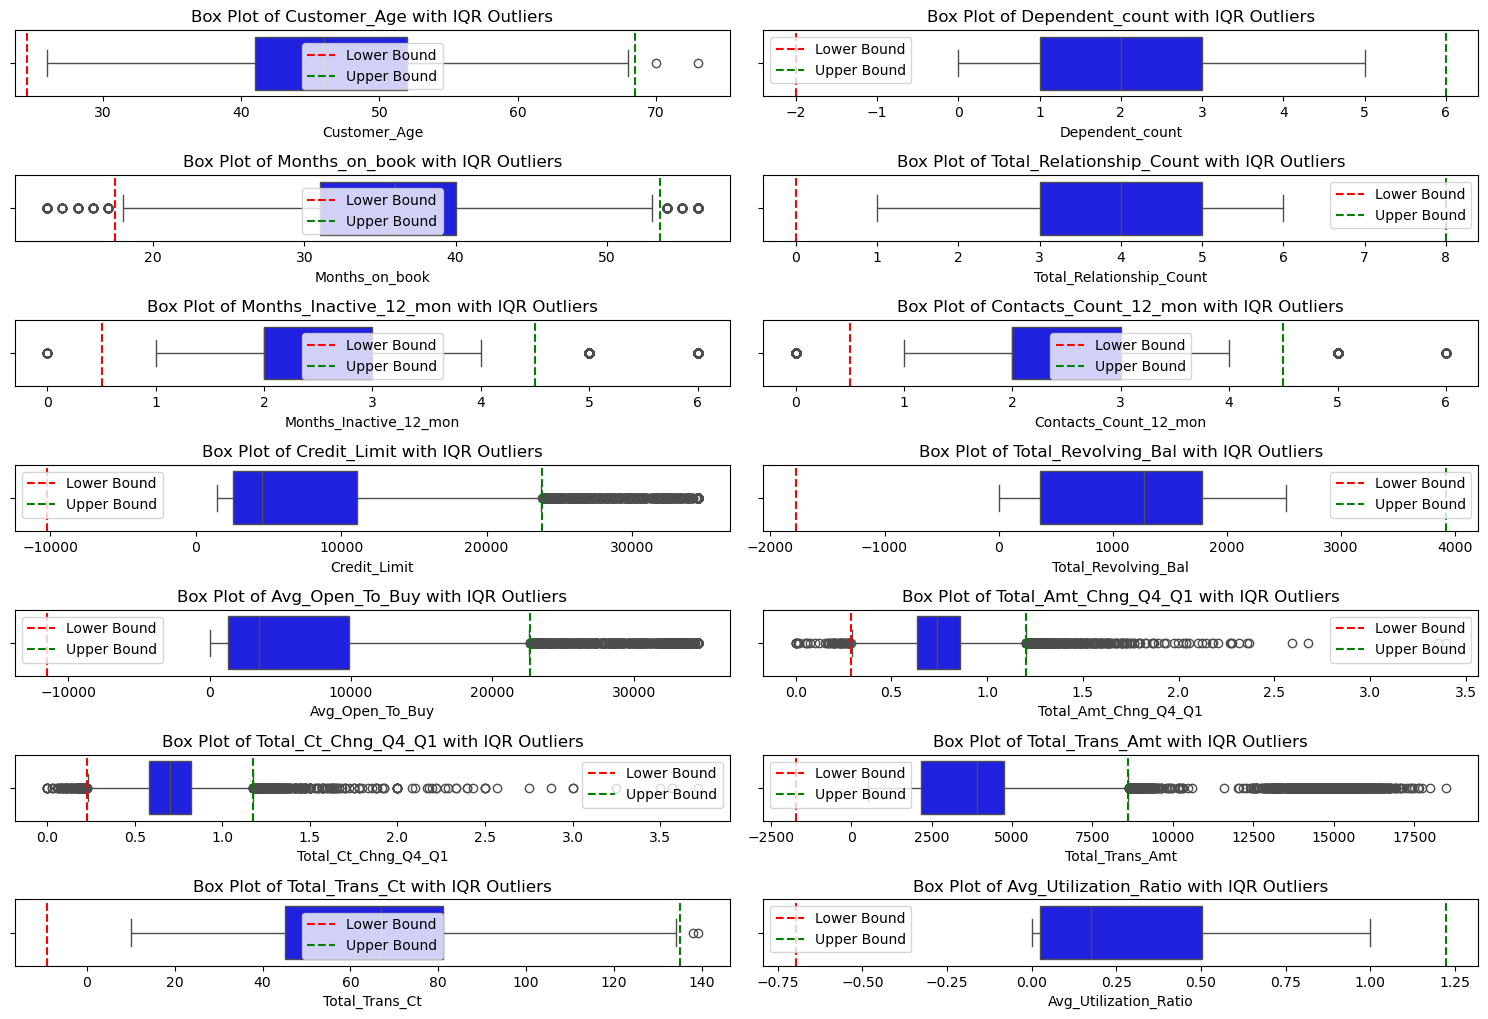

In [15]:
# Function to visualize outliers for multiple columns using IQR
def visualize_outliers_multiple_columns(df, columns):
    plt.figure(figsize=(15, 20))
    
    # Iterate through each column and plot the box plot
    for i, column in enumerate(columns):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Subplot for each column
        plt.subplot(len(columns), 2, i + 1)
        
        # Plot a boxplot
        sns.boxplot(x=df[column], color='blue')
        
        # Plot lines for lower and upper bounds
        plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
        
        # Add title and labels
        plt.title(f'Box Plot of {column} with IQR Outliers')
        plt.legend()

    # Adjust layout for readability
    plt.tight_layout()
    plt.show()

# List of numeric columns you want to analyze for outliers
numeric_columns_to_examine = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Example usage: Visualizing outliers across multiple columns
visualize_outliers_multiple_columns(df, numeric_columns_to_examine)

#### 3.2.3 Detect the number of records with outliers
<a name="detect-records-with-outliers">
Number of records with at least one outlier: 3326

In [17]:
# Function to detect outliers using IQR and mark them in the DataFrame
def mark_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mark True if the value is an outlier, False otherwise
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Create a new DataFrame to mark outliers for all numeric columns
outliers_df = pd.DataFrame()

# List of numeric columns to examine for outliers
numeric_columns_to_examine = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Mark outliers for each column
for column in numeric_columns_to_examine:
    outliers_df[column] = mark_outliers_iqr(df, column)

# Count how many rows have at least one outlier
outliers_df['has_outlier'] = outliers_df.any(axis=1)

# Number of records with at least one outlier
num_records_with_outliers = outliers_df['has_outlier'].sum()

print(f"Number of records with at least one outlier: {num_records_with_outliers}")

Number of records with at least one outlier: 3326


#### 3.2.4 Cap the Outliers (Replace them with lower/upper bounds)
<a name="cap-outliers">

In [19]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Cap outliers for each numeric column
for column in numeric_columns_to_examine:
    cap_outliers_iqr(df, column)

print("Outliers have been capped.")
df.head()

Outliers have been capped.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061
1,818770008,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,...,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105
2,713982108,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,...,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000
3,769911858,Existing Customer,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760
4,709106358,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,...,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000


### 3.3 Change Data Type
<a name="change-data-type"></a>
Ensure that the data types are correct for each feature, particularly for categorical variables.

In [21]:
# Convert categorical variables to 'category' type if not already done
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Check data types
print("Data Types Summary:")
print(df.dtypes)

print("Categorical variables have been converted to 'category' type.")

Data Types Summary:
CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                 float64
Gender                      category
Dependent_count              float64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book               float64
Total_Relationship_Count     float64
Months_Inactive_12_mon       float64
Contacts_Count_12_mon        float64
Credit_Limit                 float64
Total_Revolving_Bal          float64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt              float64
Total_Trans_Ct               float64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object
Categorical variables have been converted to 'category' type.


### 3.4 Encoding Categorical Variables
<a name="encoding-categorical-variables"></a>

In [23]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity by removing one level from each categorical feature
print("Categorical variables have been encoded using one-hot encoding.")

Categorical variables have been encoded using one-hot encoding.


In [24]:
df_encoded.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,818770008,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,713982108,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,769911858,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,...,False,True,False,False,False,True,False,False,False,False
4,709106358,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,...,False,False,False,True,False,False,False,False,False,False


In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  int64  
 1   Customer_Age                      10127 non-null  float64
 2   Dependent_count                   10127 non-null  float64
 3   Months_on_book                    10127 non-null  float64
 4   Total_Relationship_Count          10127 non-null  float64
 5   Months_Inactive_12_mon            10127 non-null  float64
 6   Contacts_Count_12_mon             10127 non-null  float64
 7   Credit_Limit                      10127 non-null  float64
 8   Total_Revolving_Bal               10127 non-null  float64
 9   Avg_Open_To_Buy                   10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 11  Total_Trans_Amt                   10127 non-null  float64
 12  Tota

In [26]:
# Save the DataFrame to CSV (assuming df_encoded is your processed DataFrame)
df_encoded.to_csv('EDA_ready.csv', index=False)

# Confirm the file is saved
print("The DataFrame has been saved as 'EDA_ready.csv'.")

The DataFrame has been saved as 'EDA_ready.csv'.
